In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('salary_train.csv')
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [4]:
df.tail()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
244763,72705211,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244765,72705213,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244766,72705216,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk
244767,72705235,Accountant,This entrepreneurial and growing private equit...,Hitchin,Hitchin,NaN,permanent,NaN,Teaching Jobs,"40-45,000",42500,hays.co.uk


In [5]:
df.describe()

,Id,SalaryNormalized
count,2.447680e+05,244768.000000
mean,6.970142e+07,34122.577576
std,3.129813e+06,17640.543124
min,1.261263e+07,5000.000000
25%,6.869550e+07,21500.000000
50%,6.993700e+07,30000.000000
75%,7.162606e+07,42500.000000
max,7.270524e+07,200000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [7]:
df.isna().sum()

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

#**Limpieza de datos**

In [8]:
df['ContractType'].fillna(df['ContractType'].mode()[0], inplace=True)
df['ContractTime'].fillna(df['ContractTime'].mode()[0], inplace=True)
df['Company'].fillna(df['Company'].mode()[0], inplace=True)
df['Title'].fillna(df['Title'].mode()[0], inplace=True)
df['SourceName'].fillna(df['SourceName'].mode()[0], inplace=True)

In [9]:
df.isna().sum()

Id                    0
Title                 0
FullDescription       0
LocationRaw           0
LocationNormalized    0
ContractType          0
ContractTime          0
Company               0
Category              0
SalaryRaw             0
SalaryNormalized      0
SourceName            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244768 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        244768 non-null  object
 6   ContractTime        244768 non-null  object
 7   Company             244768 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244768 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


#**Determinar qué características incluir en tu modelo**

In [11]:
#df = df.drop('Id', axis=1)
#df = df.drop('SalaryRaw', axis=1)
#df = df.drop('SourceName', axis=1)
#df = df.drop('LocationRaw', axis=1)

Hola me gustaria explicar esto, extrañamente cuando quitaba estas columnas que no me parecian relevante mi modelo empezaba a fallar por 7mil

#**Graficos**

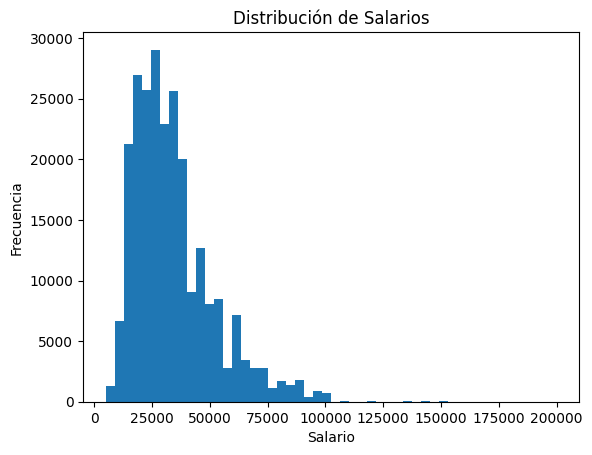

In [12]:
import matplotlib.pyplot as plt

plt.hist(df['SalaryNormalized'], bins=50)
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Distribución de Salarios')
plt.show()

En esta grafico hist podemos observar cual es el salario mas frecuente en nuestra base datos vien que la mayoria gana 25.000 anual

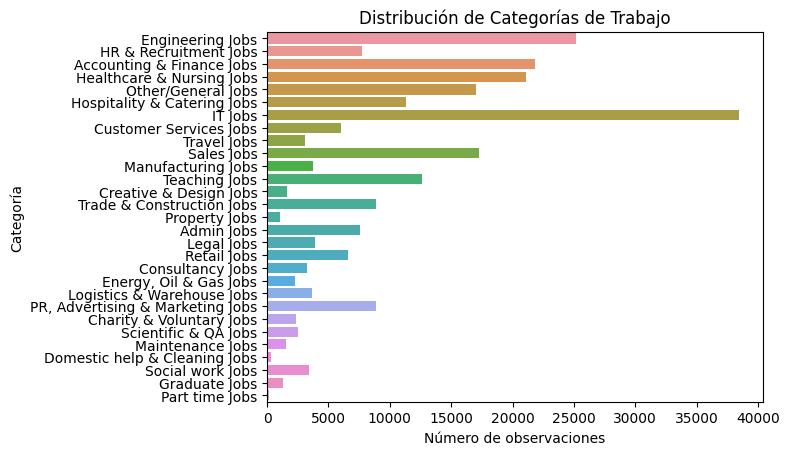

In [13]:
import seaborn as sns

sns.countplot(y='Category', data=df)
plt.xlabel('Número de observaciones')
plt.ylabel('Categoría')
plt.title('Distribución de Categorías de Trabajo')
plt.show()

En este grafico podemos observar que la mayoria de empleos se dan en IT osea informatica

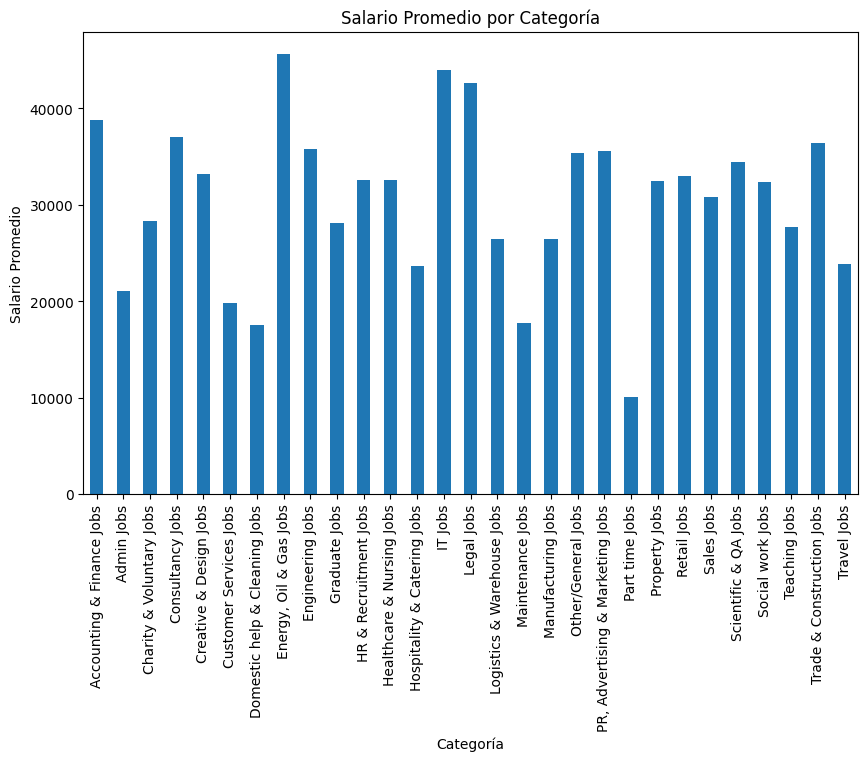

In [14]:
# Agrupar por categoría y obtener la media de salario normalizado
salary_by_category = df.groupby('Category')['SalaryNormalized'].mean()

# Crear un gráfico de barras apiladas
salary_by_category.plot(kind='bar', stacked=True, figsize=(10,6))

# Agregar etiquetas y título al gráfico
plt.xlabel('Categoría')
plt.ylabel('Salario Promedio')
plt.title('Salario Promedio por Categoría')

# Mostrar el gráfico
plt.show()

In [15]:
#En este grafico podemos observar cual es el trabajo con mejor ingreso promedio

#**Manejar las variables categóricas para prepararte para el aprendizaje automático**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244768 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        244768 non-null  object
 6   ContractTime        244768 non-null  object
 7   Company             244768 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244768 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [17]:
from sklearn.preprocessing import LabelEncoder

# Seleccionar las columnas categóricas
categorical_cols = ['Title', 'FullDescription','LocationRaw', 'LocationNormalized', 'ContractType', 'ContractTime', 'Company', 'Category','SalaryRaw','SourceName']

# Crear una instancia del encoder
encoder = LabelEncoder()

# Iterar sobre cada columna categórica y aplicar el encoder
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Id                  244768 non-null  int64
 1   Title               244768 non-null  int32
 2   FullDescription     244768 non-null  int32
 3   LocationRaw         244768 non-null  int32
 4   LocationNormalized  244768 non-null  int32
 5   ContractType        244768 non-null  int32
 6   ContractTime        244768 non-null  int32
 7   Company             244768 non-null  int32
 8   Category            244768 non-null  int32
 9   SalaryRaw           244768 non-null  int32
 10  SalaryNormalized    244768 non-null  int64
 11  SourceName          244768 non-null  int32
dtypes: int32(10), int64(2)
memory usage: 13.1 MB


In [19]:
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,39226,68300,5177,750,0,1,7757,8,21343,25000,42
1,12612830,121387,196350,6880,986,0,1,7757,8,32426,30000,42
2,12612844,73485,117823,7629,1068,0,1,7757,8,21538,30000,42
3,12613049,39227,68299,17182,2309,0,1,7757,8,31839,27500,42
4,12613647,85434,157838,17182,2309,0,1,7757,8,21343,25000,42


#**Creacion de modelo**

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

In [21]:
X = df.drop(columns=["SalaryNormalized"],axis=1)
y = df["SalaryNormalized"]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
transformer = make_pipeline(StandardScaler(), PCA(n_components=.85))
model = RandomForestRegressor(n_jobs=-1)
rf_pipe = make_pipeline(transformer, model)
rf_pipe.fit(X_train, y_train)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

# calcular el error cuadrático medio de prueba
mse = mean_squared_error(y_test, y_pred)

# calcular la raíz del error cuadrático medio de prueba
rmse = np.sqrt(mse)

# reportar la RCMP
print("RMSE en conjunto de prueba: ", rmse)

RMSE en conjunto de prueba:  5732.074624866433


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R^2: ", r2)

Coeficiente de determinación R^2:  0.8939048021686354


In [25]:
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,39226,68300,5177,750,0,1,7757,8,21343,25000,42
1,12612830,121387,196350,6880,986,0,1,7757,8,32426,30000,42
2,12612844,73485,117823,7629,1068,0,1,7757,8,21538,30000,42
3,12613049,39227,68299,17182,2309,0,1,7757,8,31839,27500,42
4,12613647,85434,157838,17182,2309,0,1,7757,8,21343,25000,42


#**generar predicciones en un conjunto de datos de prueba retenido utilizando el modelo que construiste**

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Crear un diccionario con los datos de entrada
new_data = {'Id': ['72705236'],
            'Title': ['Engineering Systems Analyst'],
            'FullDescription': ['Engineering Systems Analyst Dorking Surrey Salary'],
            'LocationRaw': ['Hampshire, South East, South East'],
            'LocationNormalized': ['Hampshire'],
            'ContractType': ['full_time'],
            'ContractTime': ['permanent'],
            'Company': ['Gregory Martin International'],
            'Category': ['Engineering Jobs'],
            'SalaryRaw': ['50000'],
            'SourceName': ['cv-library.co.uk']}

# Convertir a DataFrame
new_data = pd.DataFrame(new_data)

# Seleccionar las columnas categóricas
categorical_cols = ['Title', 'FullDescription','LocationRaw', 'LocationNormalized', 'ContractType', 'ContractTime', 'Company', 'Category','SalaryRaw','SourceName']

# Crear una instancia del encoder
encoder = LabelEncoder()

# Iterar sobre cada columna categórica y aplicar el encoder
for col in categorical_cols:
    new_data[col] = encoder.fit_transform(new_data[col].astype(str))



# Realizar predicciones en los nuevos datos
predictions = model.predict(new_data)

# Imprimir las predicciones
print(predictions)


[43669.28]
